### Урок 7. Многомерный статистический анализ. Линейная регрессия

- Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

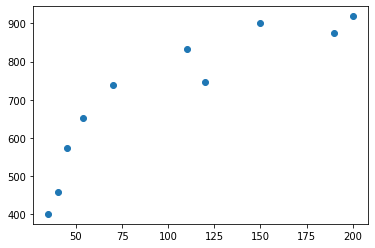

In [55]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp, ks)
plt.show()

In [56]:
b = ((zp * ks).mean() - zp.mean() * ks.mean()) / ((zp ** 2).mean() - (zp.mean() ** 2))
b

2.620538882402765

In [57]:
a = ks.mean() - b * zp.mean()
a

444.1773573243596

In [58]:
mse_num = np.sum(((a + b * zp) - ks) ** 2 / 10)
mse_num

6470.414201176659

Без interсept

In [59]:
zp = zp.reshape(1, len(zp))
ks = ks.reshape(1, len(ks))
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)
mse_num = np.sum(((0 + 5.88982042 * zp) - ks) ** 2 / 10)
mse_num

56516.85841571942

In [60]:
def mse_count(w1, y=ks, X=zp, n=10):
    return np.sum((w1 * X - y) ** 2) / n

In [61]:
np.sum((5.88982042 * zp - ks) ** 2) / 10

56516.85841571943

In [62]:
zp = np.vstack([np.ones((1, 10)), zp])
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([[444.17735732],
       [  2.62053888]])

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [71]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-6
w1 = 0.1

In [72]:
for i in range(1000):
    fp = (1 / 10) * np.sum(2 * (w1 * zp_3 - ks_3) * zp)
    w1 -= alpha * fp
    if i % 100 == 0:
        print('i = {0}, w1 = {1}, mse = {2}'.format(i, w1, mse_count(w1)))

i = 0, w1 = 0.25952808000000005, mse = 493237.7212546963
i = 100, w1 = 5.54537842245223, mse = 58151.31823171113
i = 200, w1 = 5.868748638669329, mse = 56522.97550129376
i = 300, w1 = 5.888531320728348, mse = 56516.88130936019
i = 400, w1 = 5.8897415574471985, mse = 56516.85850140053
i = 500, w1 = 5.889815595583751, mse = 56516.858416040064
i = 600, w1 = 5.889820124983314, mse = 56516.85841572062
i = 700, w1 = 5.889820402076462, mse = 56516.85841571941
i = 800, w1 = 5.88982041902807, mse = 56516.8584157194
i = 900, w1 = 5.889820420065112, mse = 56516.85841571941
